<a href="https://colab.research.google.com/github/SAGNIK2502/A_Visual_History_of_Nobel_Prize_Winners/blob/main/NobelPrizeHistoryAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
# Reading in the Nobel Prize data
nobel = pd.read_csv('/content/nobel.csv')

# Taking a look at the first several winners
nobel.head(200)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1937,Physics,The Nobel Prize in Physics 1937,"""for their experimental discovery of the diffr...",1/2,44,Individual,Clinton Joseph Davisson,1881-10-22,"Bloomington, IL",United States of America,Male,Bell Telephone Laboratories,"New York, NY",United States of America,1958-02-01,"Charlottesville, VA",United States of America
196,1937,Physics,The Nobel Prize in Physics 1937,"""for their experimental discovery of the diffr...",1/2,45,Individual,George Paget Thomson,1892-05-03,Cambridge,United Kingdom,Male,London University,London,United Kingdom,1975-09-10,Cambridge,United Kingdom
197,1938,Chemistry,The Nobel Prize in Chemistry 1938,"""for his work on carotenoids and vitamins""",1/1,198,Individual,Richard Kuhn,1900-12-03,Vienna,Austria-Hungary (Austria),Male,Kaiser-Wilhelm-Institut (now Max-Planck Instit...,Heidelberg,Germany,1967-07-31,Heidelberg,West Germany (Germany)
198,1938,Literature,The Nobel Prize in Literature 1938,"""for her rich and truly epic descriptions of p...",1/1,610,Individual,Pearl Buck,1892-06-26,"Hillsboro, WV",United States of America,Female,NaN,NaN,NaN,1973-03-06,"Danby, VT",United States of America


In [7]:
display(len(nobel['prize']))

# Display the number of prizes won by male and female recipients.
display(nobel['sex'].value_counts())

# Display the number of prizes won by the top 10 nationalities.
nobel['birth_country'].value_counts().head(25)

911

sex
Male      836
Female     49
Name: count, dtype: int64

birth_country
United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Switzerland                  16
Austria                      14
Norway                       12
China                        11
Denmark                      11
Australia                    10
Belgium                       9
South Africa                  9
Scotland                      9
Germany (Poland)              8
Spain                         7
India                         7
Prussia (Germany)             7
Egypt                         6
Hungary                       6
Name: count, dtype: int64

In [8]:
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
prop_usa_winners

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


from matplotlib import pyplot as plt
prop_usa_winners['decade'].plot(kind='hist', bins=20, title='decade')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
prop_usa_winners['usa_born_winner'].plot(kind='hist', bins=20, title='usa_born_winner')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
prop_usa_winners.plot(kind='scatter', x='decade', y='usa_born_winner', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decade']
  ys = series['usa_born_winner']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = prop_usa_winners.sort_values('decade', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decade')
_ = plt.ylabel('usa_born_winner')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['decade']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'decade'}, axis=1)
              .sort_values('decade', ascending=True))
  xs = counted['decade']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = prop_usa_winners.sort_values('decade', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decade')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
prop_usa_winners['decade'].plot(kind='line', figsize=(8, 4), title='decade')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
prop_usa_winners['usa_born_winner'].plot(kind='line', figsize=(8, 4), title='usa_born_winner')
plt.gca().spines[['top', 'right']].set_visible(False)

In [12]:
nobel['India_born_winner'] = nobel['birth_country'] == 'India'
nobel['decade'] = (np.floor(nobel['year'])).astype(int)
prop_india_winners = nobel.groupby('decade', as_index=False)['India_born_winner'].mean()

# Display the proportions of USA born winners per decade
prop_india_winners

,decade,India_born_winner
0,1901,0.000000
1,1902,0.142857
2,1903,0.000000
3,1904,0.000000
4,1905,0.000000
...,...,...
108,2012,0.000000
109,2013,0.000000
110,2014,0.076923
111,2015,0.000000


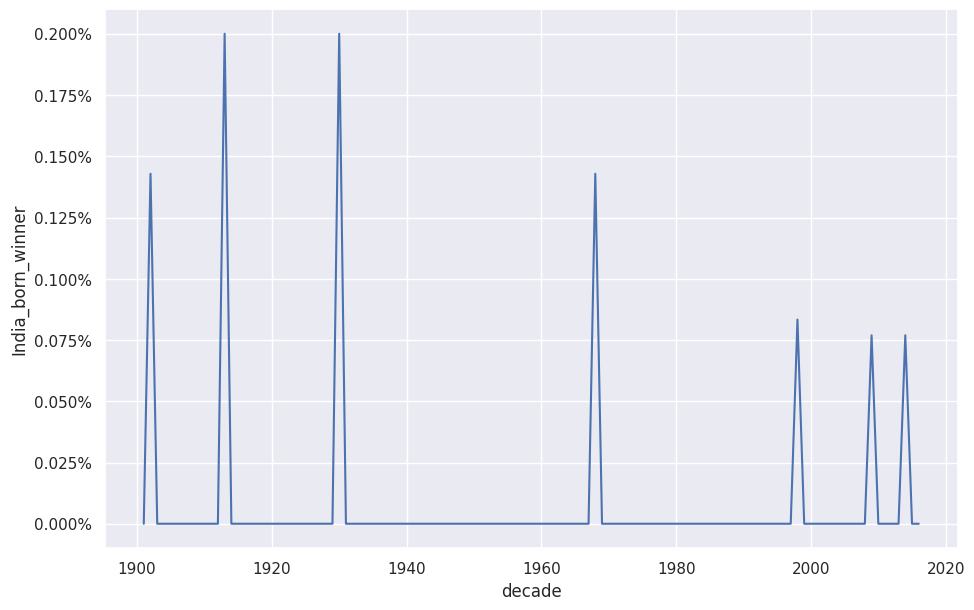

In [15]:
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners
ax = sns.lineplot(x='decade', y='India_born_winner', data=prop_india_winners)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter())

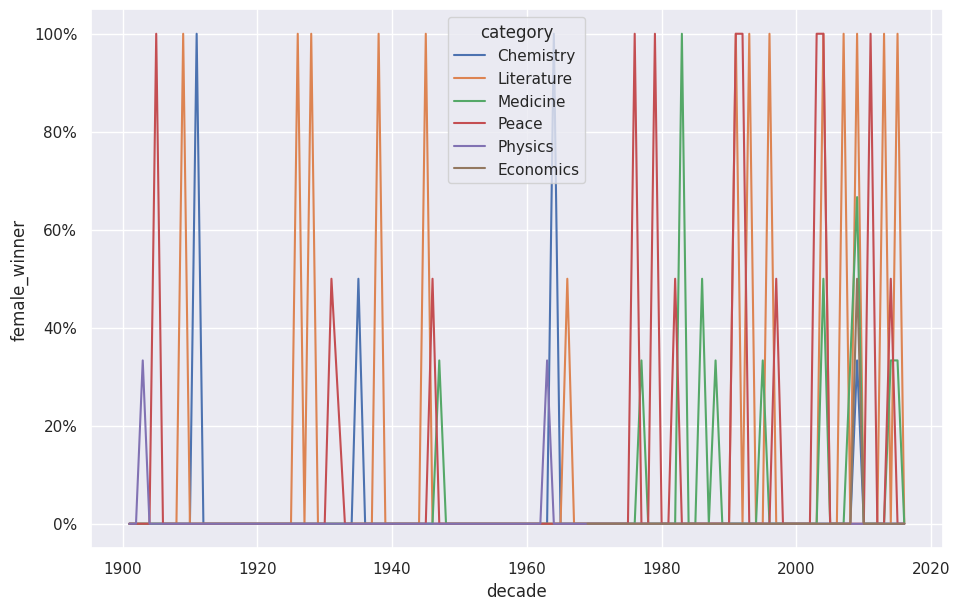

In [16]:
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade','category'], as_index=False)['female_winner'].mean()

# Plotting USA born winners with % winners on the y-axis
ax = sns.lineplot(x='decade', y='female_winner', data=prop_female_winners, hue='category')
ax.yaxis.set_major_formatter(PercentFormatter(1.0))


In [17]:
nobel.groupby('full_name').filter(lambda group: len(group) >= 2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,India_born_winner,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1903,False,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1911,False,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1917,False,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1944,False,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1954,False,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1954,False,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1956,False,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1958,False,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1962,False,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1963,False,False


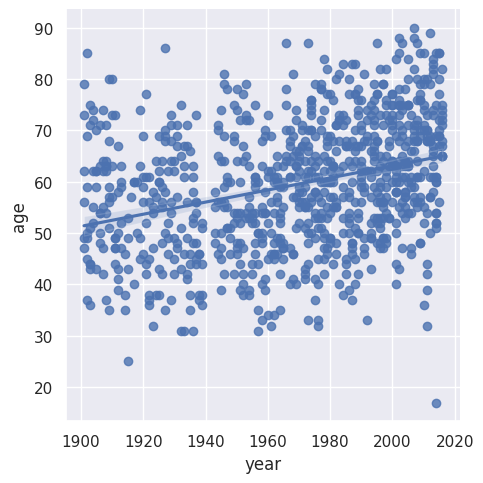

In [18]:
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age', data=nobel)

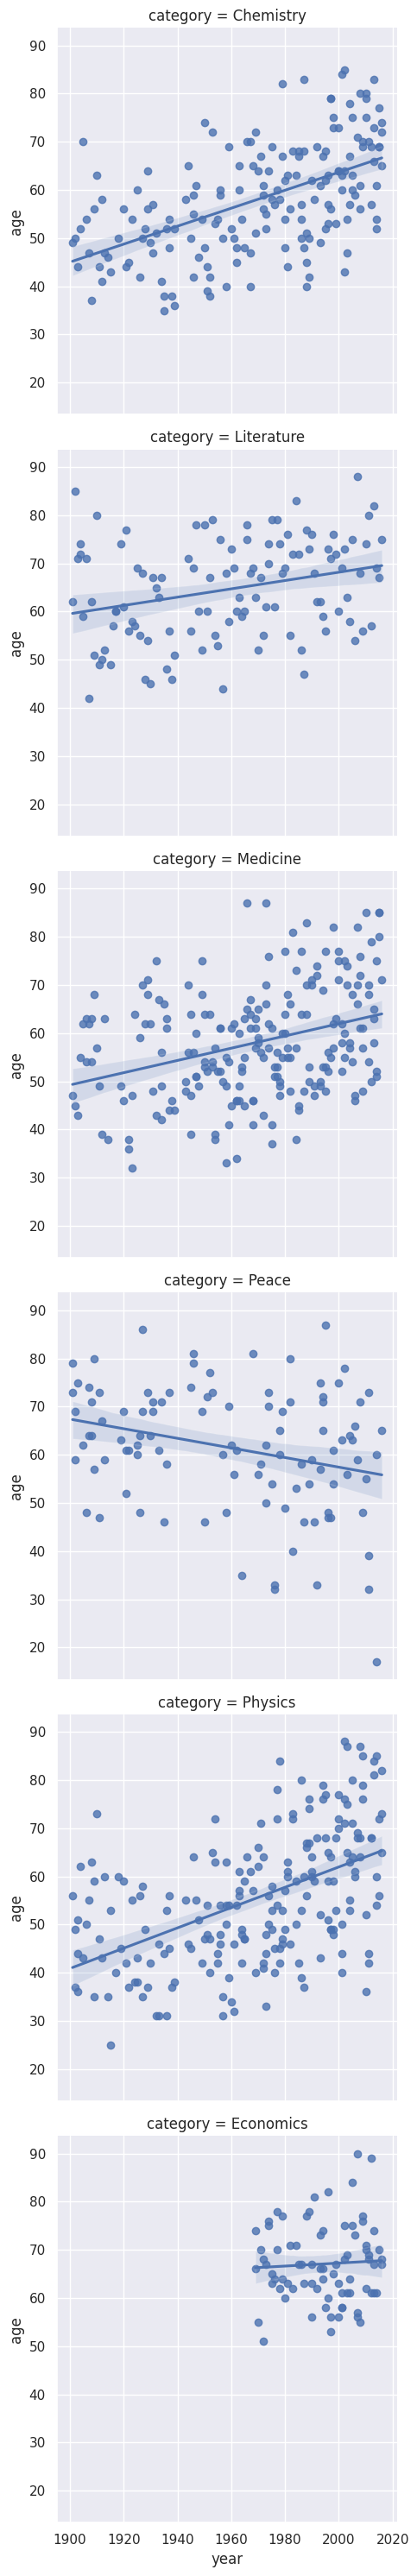

In [19]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x='year', y='age', data=nobel, row='category')


In [20]:
nobel.nlargest(1, 'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,India_born_winner,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2007,False,False,90.0


In [25]:
nobel.groupby('full_name').filter(lambda group: len(group) >= 3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,India_born_winner,female_winner,age
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,False,1917,False,False,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,False,1944,False,False,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,False,1963,False,False,NaN


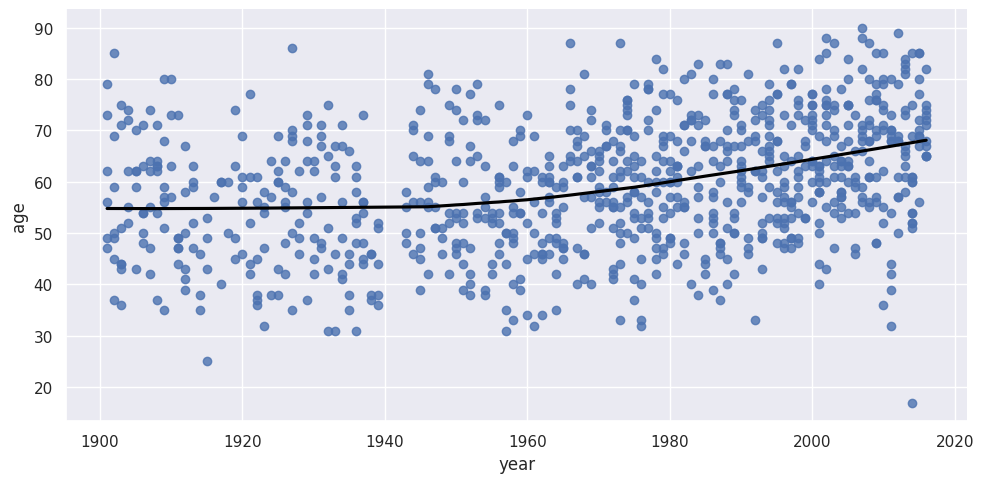

In [26]:
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age', data=nobel, lowess=True, aspect=2, line_kws={'color' : 'black'})

In [27]:
top_gender = nobel['sex'].value_counts().index[0]
top_gender

'Male'

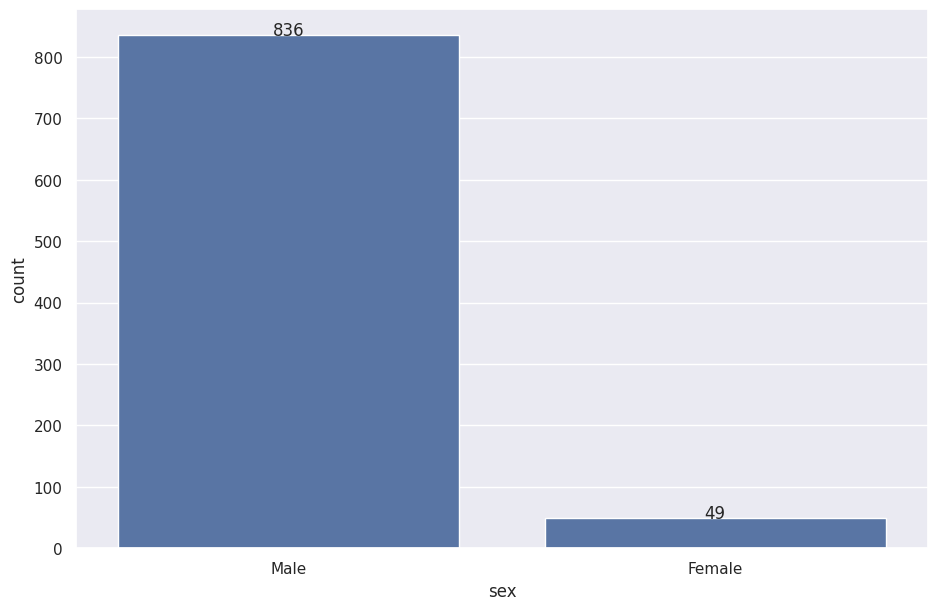

In [28]:
sns.countplot(x='sex', data=nobel)
counts = nobel['sex'].value_counts()

for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.show()

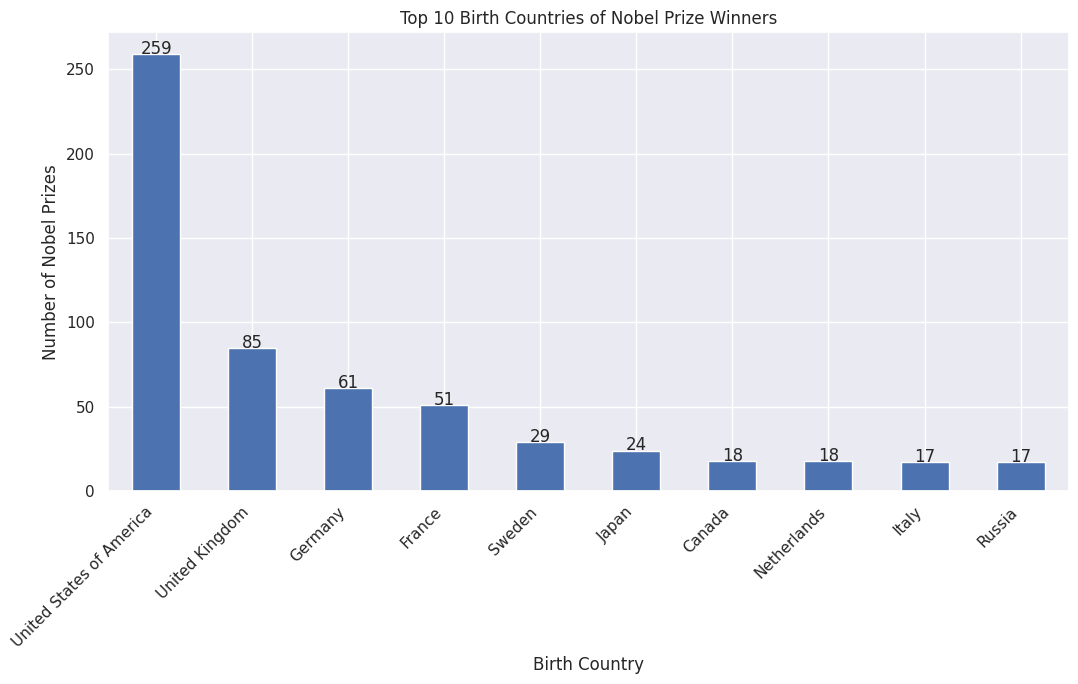

In [31]:
top_country = nobel['birth_country'].value_counts().index[0]

topCountries =  nobel['birth_country'].value_counts().head(10)

topCountries.plot(kind='bar')

for i, count in enumerate(topCountries):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.xlabel('Birth Country')
plt.ylabel('Number of Nobel Prizes')
plt.title('Top 10 Birth Countries of Nobel Prize Winners')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

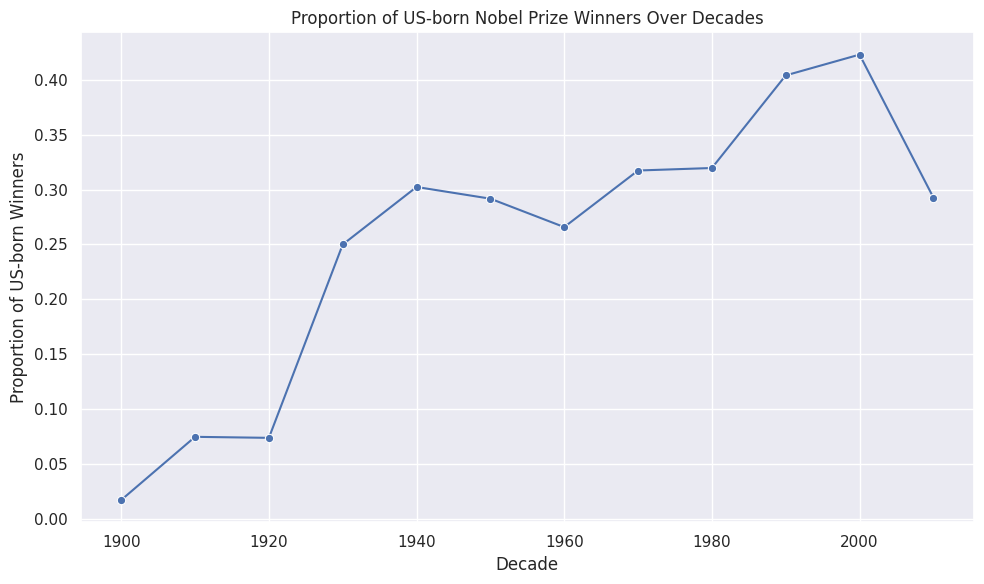

In [34]:
nobel['us_born'] = nobel['birth_country'] == top_country

nobel['decade'] = (np.floor(nobel['year'] // 10) * 10).astype(int)

usa_born_winner = nobel.groupby('decade', as_index=False)['us_born'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(data=usa_born_winner, x='decade', y='us_born', marker='o')

plt.xlabel('Decade')
plt.ylabel('Proportion of US-born Winners')
plt.title('Proportion of US-born Nobel Prize Winners Over Decades')

plt.grid(True)
plt.tight_layout()
plt.show()

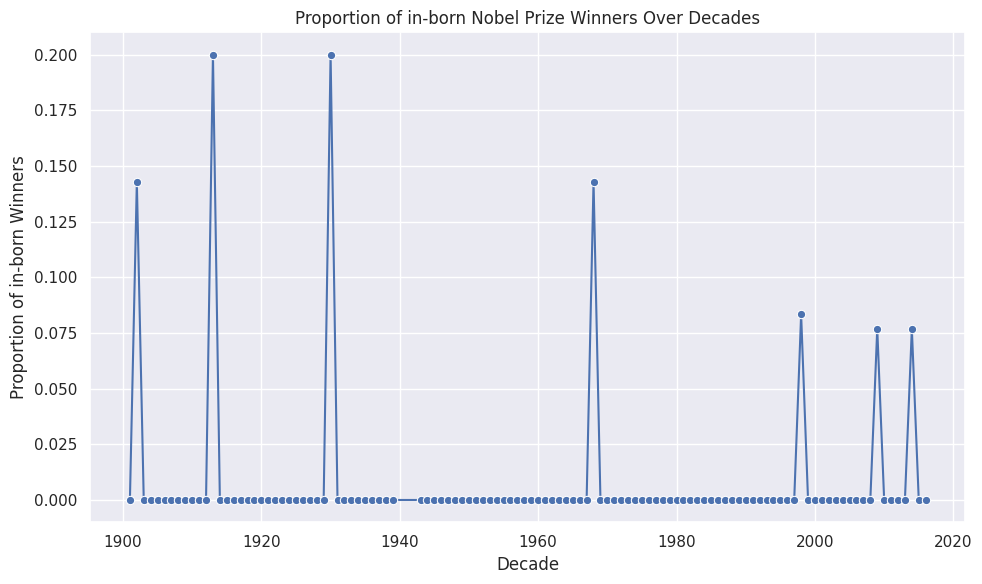

In [39]:
nobel['in_born'] = nobel['birth_country'] == 'India'

nobel['decade'] = (np.floor(nobel['year'])).astype(int)

usa_born_winner = nobel.groupby('decade', as_index=False)['in_born'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(data=usa_born_winner, x='decade', y='in_born', marker='o')

plt.xlabel('Decade')
plt.ylabel('Proportion of in-born Winners')
plt.title('Proportion of in-born Nobel Prize Winners Over Decades')

plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
nobel['female'] = nobel['sex'] == "Female"

proportion_female = nobel.groupby(['decade', 'category'], as_index=False)['female'].mean()
proportion_female_sorted = proportion_female.sort_values(by='female', ascending=False)

proportion_female_sorted

,decade,category,female
425,1991,Literature,1.0
437,1993,Literature,1.0
23,1905,Peace,1.0
557,2013,Literature,1.0
107,1926,Literature,1.0
...,...,...,...
193,1948,Literature,0.0
192,1948,Chemistry,0.0
191,1947,Physics,0.0
190,1947,Peace,0.0


In [43]:
max_female_pair = proportion_female.loc[proportion_female['female'].idxmax()]
max_female_pair

decade       1905
category    Peace
female        1.0
Name: 23, dtype: object

In [44]:
max_female_dict = { max_female_pair['decade'] : max_female_pair['category']}
max_female_dict

{1905: 'Peace'}

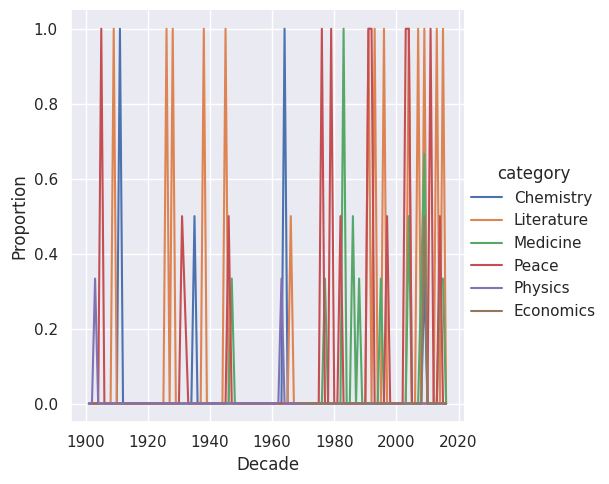

In [45]:
sns.relplot(x='decade', y='female', data=proportion_female, hue='category', kind='line')
plt.xlabel('Decade')
plt.ylabel('Proportion')
plt.show()

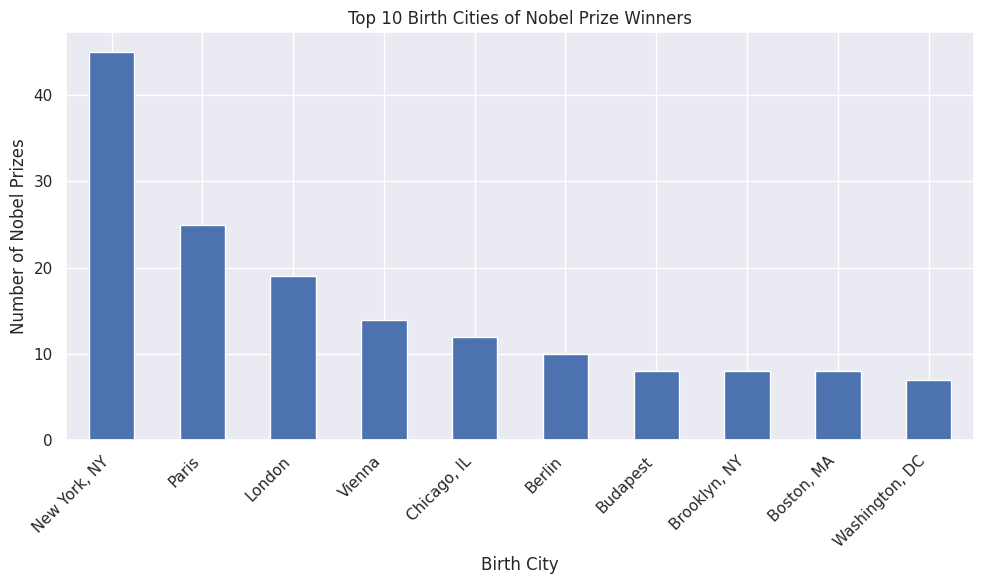

In [47]:
top_birth_cities = nobel['birth_city'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_birth_cities.plot(kind='bar')
plt.xlabel('Birth City')
plt.ylabel('Number of Nobel Prizes')
plt.title('Top 10 Birth Cities of Nobel Prize Winners')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

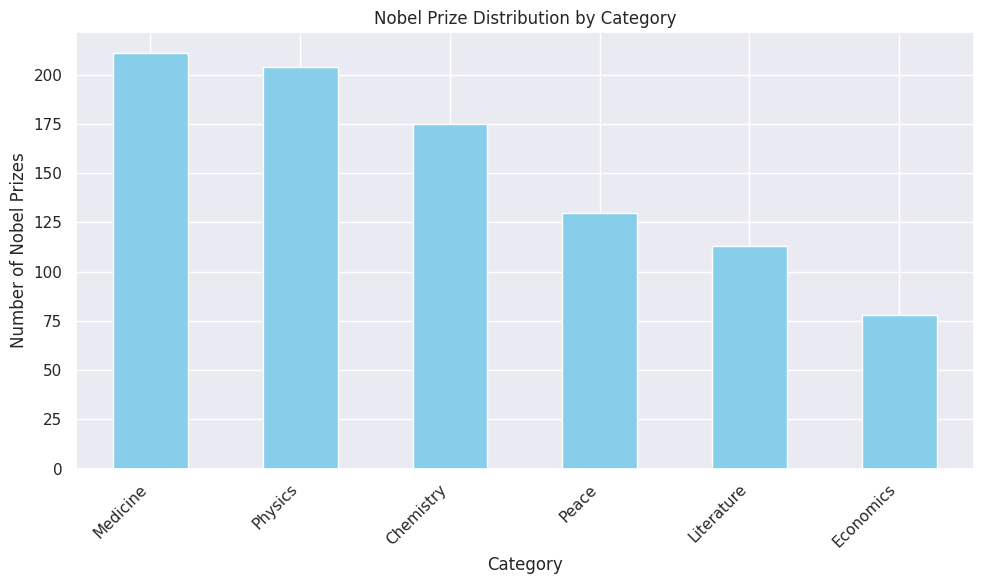

In [50]:
category_counts = nobel['category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Nobel Prizes')
plt.title('Nobel Prize Distribution by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-51-c038150a231d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nobel['age_at_award'] = nobel['year'] - nobel['birth_date'].dt.year


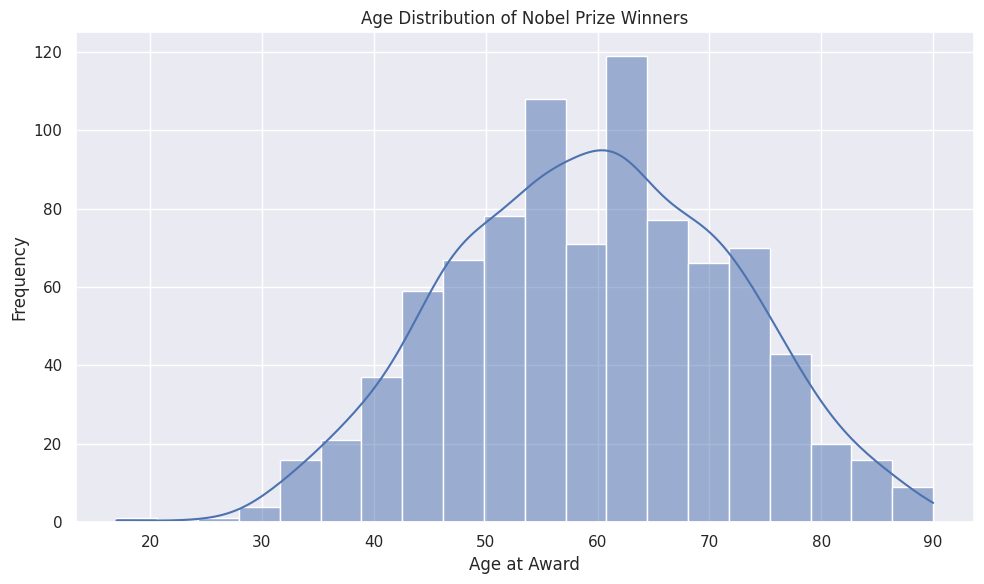

In [51]:
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'], errors='coerce')

nobel = nobel.dropna(subset=['birth_date'])

nobel['age_at_award'] = nobel['year'] - nobel['birth_date'].dt.year

plt.figure(figsize=(10, 6))
sns.histplot(nobel['age_at_award'], bins=20, kde=True)
plt.xlabel('Age at Award')
plt.ylabel('Frequency')
plt.title('Age Distribution of Nobel Prize Winners')
plt.grid(True)
plt.tight_layout()
plt.show()